# **Grafici**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
nodes_loading_cent = pd.read_csv(
    "./../results/loading_nodes_cent.csv", index_col=[0, 1]
)
edges_loading_cent = pd.read_csv(
    "./../results/loading_edges_cent.csv", index_col=[0, 1]
)
nodes_loading_dist = pd.read_csv(
    "./../results/loading_nodes_dist.csv", index_col=[0, 1]
)
edges_loading_dist = pd.read_csv(
    "./../results/loading_edges_dist.csv", index_col=[0, 1]
)

## Nodes

In [3]:
cols = [
    "ex",
    "qty",
    "city",
    "color",
    "country",
    "located_in",
    "movie",
    "movie_category",
    "user",
    "university",
]

nodes_loading_cent.reset_index(inplace=True)
nodes_loading_cent.columns = cols

nodes_loading_dist.reset_index(inplace=True)
nodes_loading_dist.columns = cols

### Centralized

In [4]:
summary_nodes_cent = (
    nodes_loading_cent.groupby("qty")["user"].agg(["mean", "std"]).reset_index()
)
summary_nodes_cent.head()

,qty,mean,std
0,100,0.343376,0.010452
1,500,0.455532,0.022941
2,1000,0.788556,0.020493
3,5000,3.409157,0.043784
4,10000,6.537711,0.122600


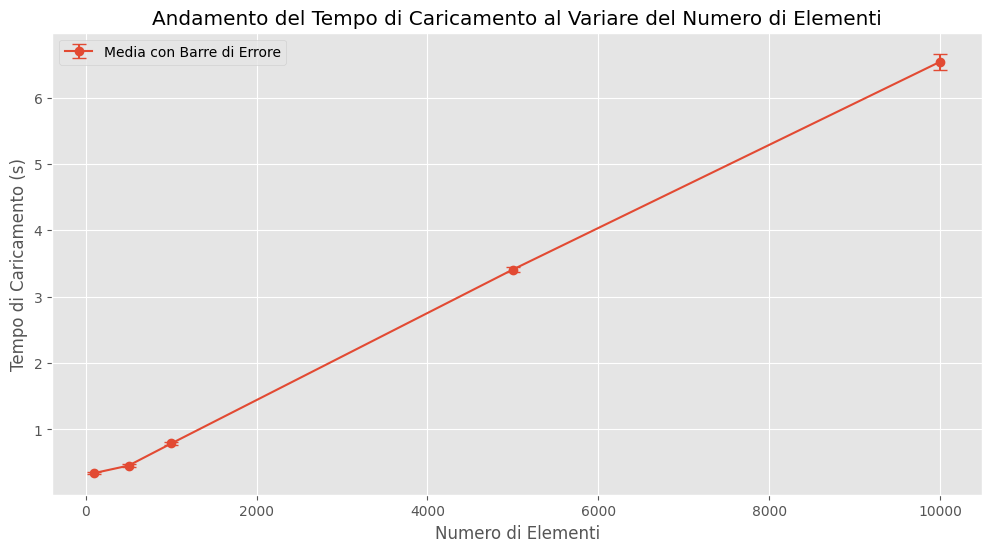

In [5]:
plt.figure(figsize=(12, 6))
plt.errorbar(
    summary_nodes_cent["qty"],
    summary_nodes_cent["mean"],
    yerr=summary_nodes_cent["std"],
    fmt="-o",
    capsize=5,
    label="Media con Barre di Errore",
)
plt.title("Andamento del Tempo di Caricamento al Variare del Numero di Elementi")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
plt.show()

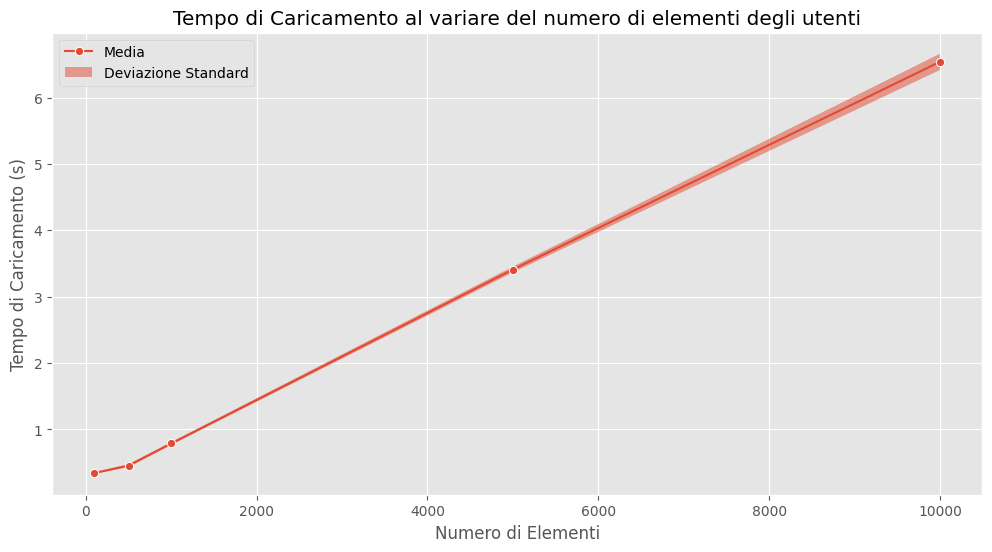

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="qty", y="mean", data=summary_nodes_cent, marker="o", label="Media")
plt.fill_between(
    summary_nodes_cent["qty"],
    summary_nodes_cent["mean"] - summary_nodes_cent["std"],
    summary_nodes_cent["mean"] + summary_nodes_cent["std"],
    alpha=0.5,
    label="Deviazione Standard",
)

# Personalizza il grafico
plt.title("Tempo di Caricamento al variare del numero di elementi degli utenti")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
plt.show()

### Distributed

In [18]:
summary_nodes_dist = (
    nodes_loading_dist.groupby("qty")["user"].agg(["mean", "std"]).reset_index()
)
summary_nodes_dist.head()

,qty,mean,std
0,100,0.384146,0.012112
1,500,0.608811,0.021850
2,1000,1.058842,0.025522
3,5000,4.572916,0.086365
4,10000,8.781435,0.155797


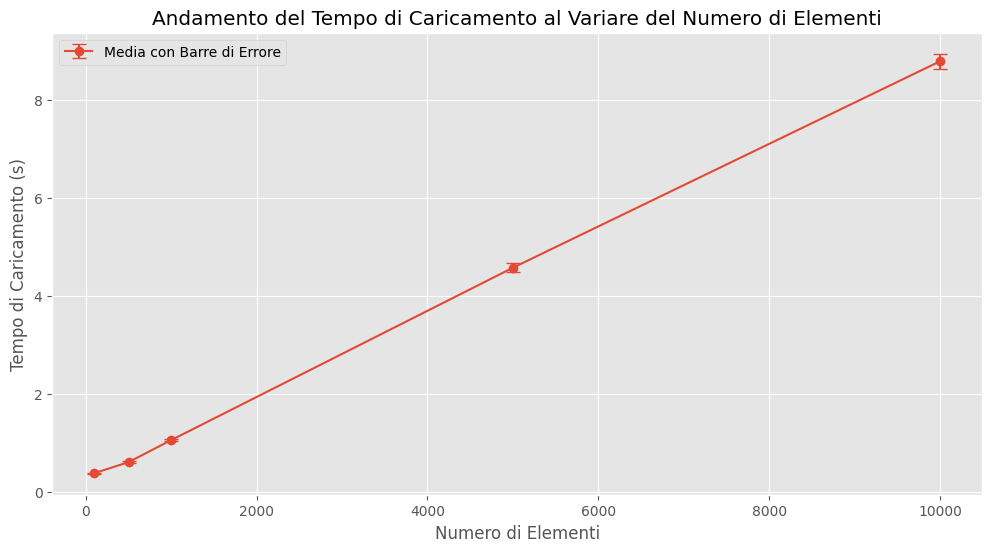

In [19]:
plt.figure(figsize=(12, 6))
plt.errorbar(
    summary_nodes_dist["qty"],
    summary_nodes_dist["mean"],
    yerr=summary_nodes_dist["std"],
    fmt="-o",
    capsize=5,
    label="Media con Barre di Errore",
)
plt.title("Andamento del Tempo di Caricamento al Variare del Numero di Elementi")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
plt.show()

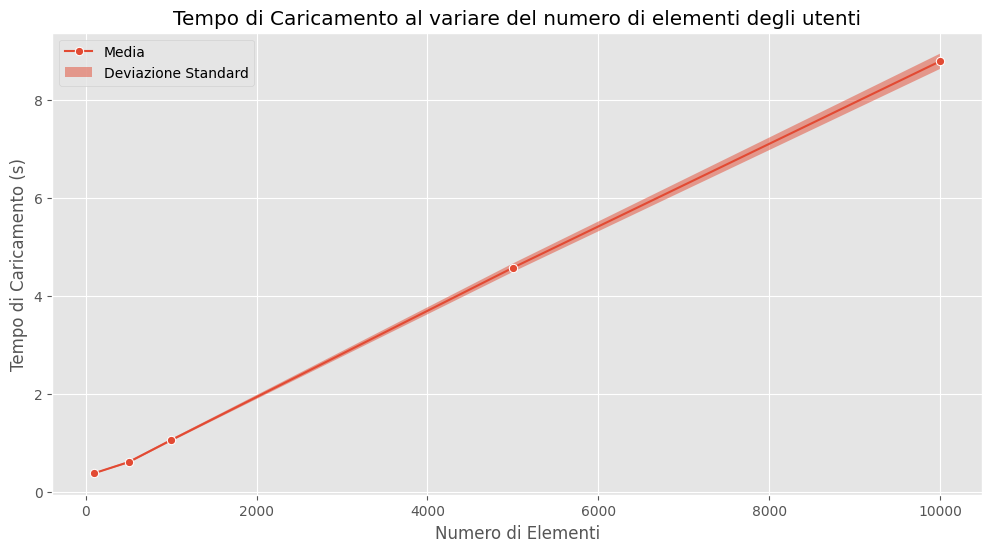

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="qty", y="mean", data=summary_nodes_dist, marker="o", label="Media")
plt.fill_between(
    summary_nodes_dist["qty"],
    summary_nodes_dist["mean"] - summary_nodes_dist["std"],
    summary_nodes_dist["mean"] + summary_nodes_dist["std"],
    alpha=0.5,
    label="Deviazione Standard",
)

# Personalizza il grafico
plt.title("Tempo di Caricamento al variare del numero di elementi degli utenti")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
plt.show()

## Edges

In [10]:
cols = ['ex', 'qty', 'likes', 'matches']

edges_loading_cent.reset_index(inplace=True)
edges_loading_cent.columns = cols

edges_loading_dist.reset_index(inplace=True)
edges_loading_dist.columns = cols

### Centralized

In [21]:
summary_edges_cent = (
    edges_loading_cent.groupby("qty")["likes"].agg(["mean", "std"]).reset_index()
)
summary_edges_cent.head()

,qty,mean,std
0,1000,0.127601,0.004077
1,5000,0.571434,0.017320
2,10000,1.094609,0.021758
3,50000,5.357793,0.054912
4,100000,10.759882,0.061970


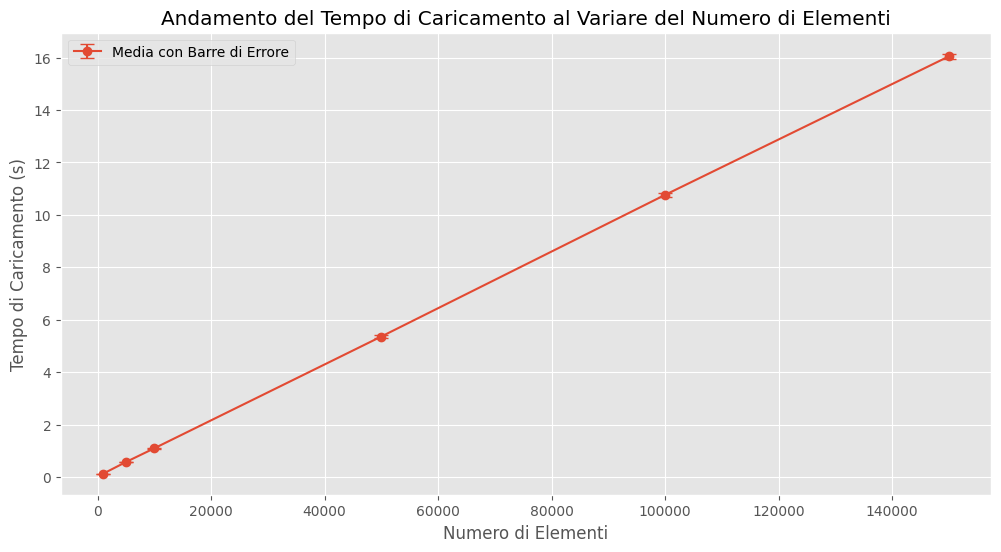

In [12]:
plt.figure(figsize=(12, 6))
plt.errorbar(
    summary_edges_cent["qty"],
    summary_edges_cent["mean"],
    yerr=summary_edges_cent["std"],
    fmt="-o",
    capsize=5,
    label="Media con Barre di Errore",
)
plt.title("Andamento del Tempo di Caricamento al Variare del Numero di Elementi")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
plt.show()

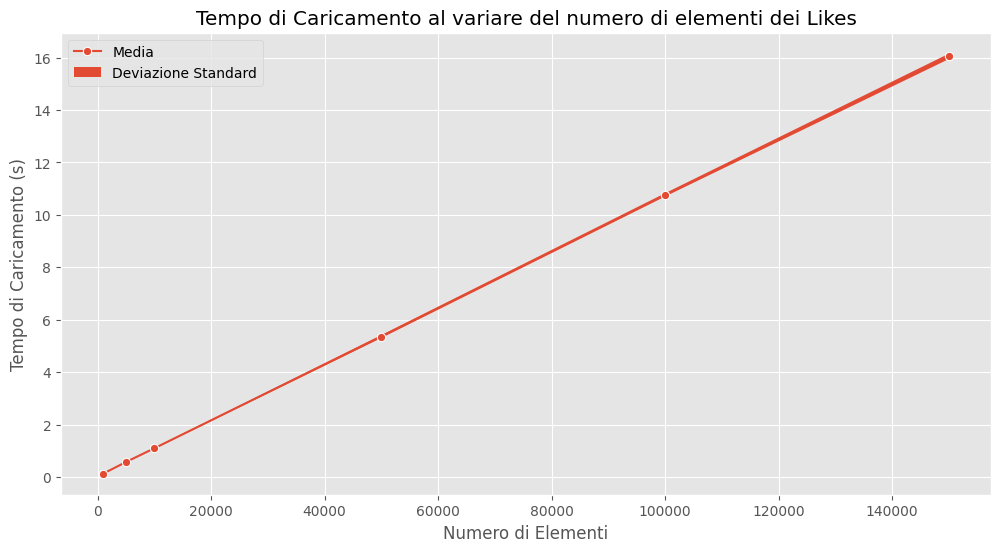

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='qty', y='mean', data=summary_edges_cent, marker='o', label='Media')
plt.fill_between(summary_edges_cent['qty'], 
                 summary_edges_cent['mean'] - summary_edges_cent['std'], 
                 summary_edges_cent['mean'] + summary_edges_cent['std'], 
                 alpha=1, label='Deviazione Standard')

# Personalizza il grafico
plt.title('Tempo di Caricamento al variare del numero di elementi dei Likes')
plt.xlabel('Numero di Elementi')
plt.ylabel('Tempo di Caricamento (s)')
plt.legend()
plt.show()

### Distributed

In [14]:
summary_edges_dist = (
    edges_loading_dist.groupby("qty")["likes"].agg(["mean", "std"]).reset_index()
)
summary_edges_dist.head()

,qty,mean,std
0,1000,0.171702,0.012019
1,5000,0.750823,0.061976
2,10000,1.456347,0.046875
3,50000,7.140843,0.085902
4,100000,14.110811,0.232587


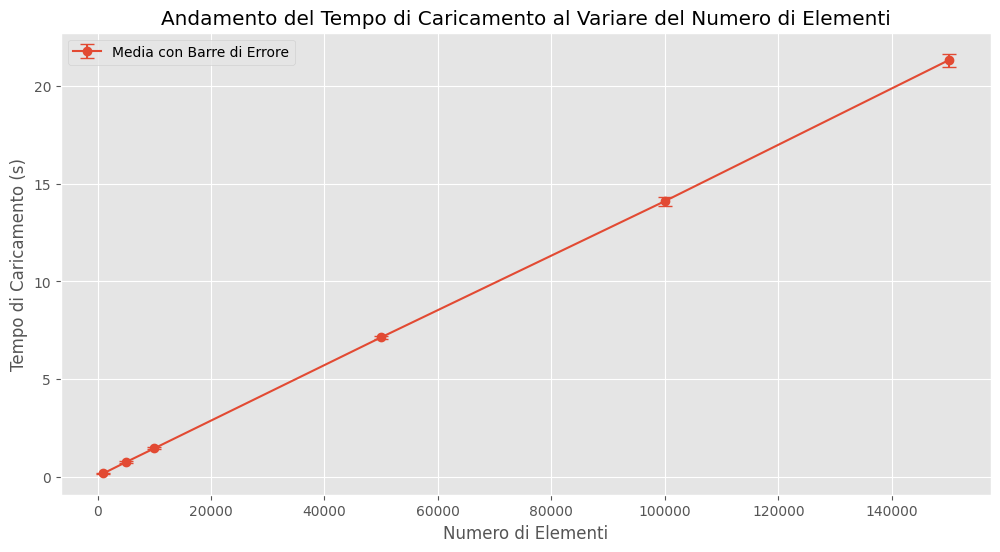

In [15]:
plt.figure(figsize=(12, 6))
plt.errorbar(
    summary_edges_dist["qty"],
    summary_edges_dist["mean"],
    yerr=summary_edges_dist["std"],
    fmt="-o",
    capsize=5,
    label="Media con Barre di Errore",
)
plt.title("Andamento del Tempo di Caricamento al Variare del Numero di Elementi")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
plt.show()

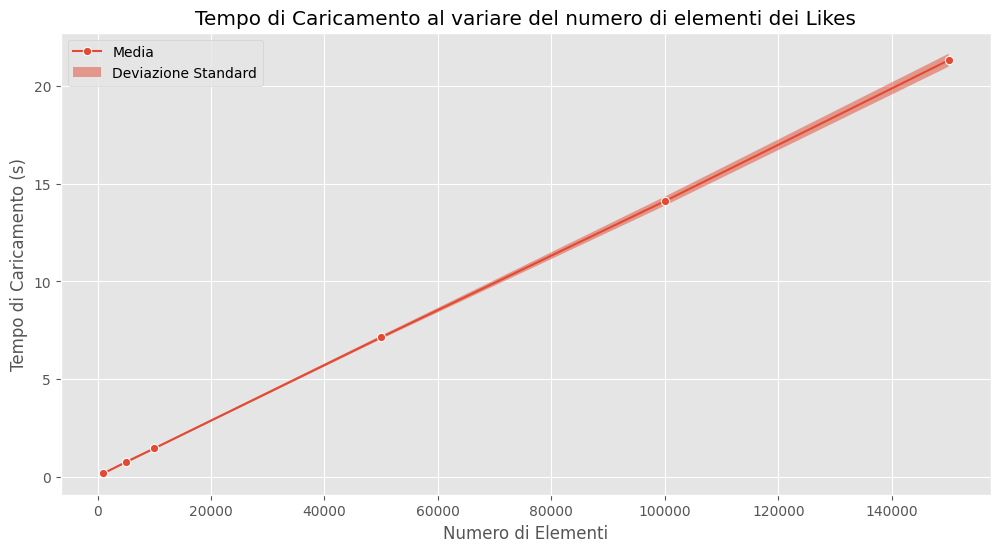

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='qty', y='mean', data=summary_edges_dist, marker='o', label='Media')
plt.fill_between(summary_edges_dist['qty'], 
                 summary_edges_dist['mean'] - summary_edges_dist['std'], 
                 summary_edges_dist['mean'] + summary_edges_dist['std'], 
                 alpha=0.5, label='Deviazione Standard')

# Personalizza il grafico
plt.title('Tempo di Caricamento al variare del numero di elementi dei Likes')
plt.xlabel('Numero di Elementi')
plt.ylabel('Tempo di Caricamento (s)')
plt.legend()
plt.show()

# Guasti

In [7]:
query_nodes_2 = pd.read_csv("./../results/query_results_2_nodes.csv", index_col=[0])
query_nodes_3 = pd.read_csv("./../results/query_results_3_nodes.csv", index_col=[0])
query_nodes_4 = pd.read_csv("./../results/query_results_4_nodes.csv", index_col=[0])

query_nodes = pd.DataFrame()
query_nodes["2 Nodes"] = query_nodes_2["Query_8"]
query_nodes["3 Nodes"] = query_nodes_3["Query_8"]
query_nodes["4 Nodes"] = query_nodes_4["Query_8"]

query_nodes.head()

,2 Nodes,3 Nodes,4 Nodes
0,0.626506,0.533695,0.696019
1,0.559710,0.548100,0.535101
2,0.582099,0.537593,0.620897
3,0.746964,0.586743,0.573950
4,0.541940,0.533861,0.564516


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


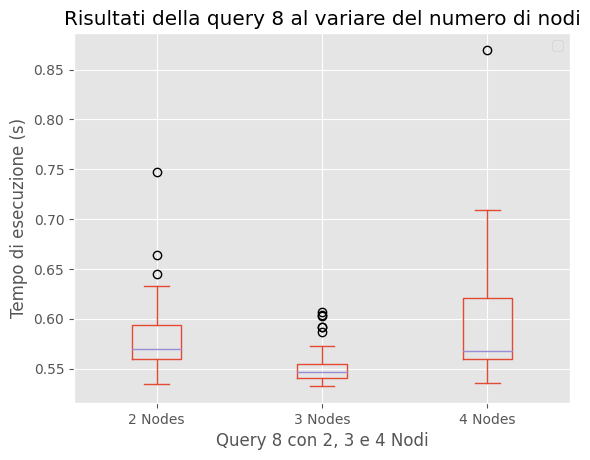

In [8]:
query_nodes.plot(kind='box')
plt.title('Risultati della query 8 al variare del numero di nodi')

plt.xlabel('Query 8 con 2, 3 e 4 Nodi')
plt.ylabel('Tempo di esecuzione (s)')
plt.legend()
plt.show()